In [1]:
!pip install pandas_datareader


In [2]:
import pandas_datareader as pdr
key=""
ticker='TSLA'

In [3]:
df = pdr.get_data_tiingo(ticker, api_key=key)

D:\python\lib\site-packages\pandas_datareader\tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  return pd.concat(dfs, self._concat_axis)


In [4]:
filename=ticker+'.csv'
df.to_csv(filename)


In [5]:
import pandas as pd

In [6]:
df=pd.read_csv(filename)

In [7]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,TSLA,2019-01-08 00:00:00+00:00,335.35,344.01,327.02,341.96,7008516,22.356667,22.934000,21.801333,22.797333,105127740,0.0,1.0
1,TSLA,2019-01-09 00:00:00+00:00,338.53,343.50,331.47,335.50,5432945,22.568667,22.900000,22.098000,22.366667,81494175,0.0,1.0
2,TSLA,2019-01-10 00:00:00+00:00,344.97,345.39,331.79,334.40,6056354,22.998000,23.026000,22.119333,22.293333,90845310,0.0,1.0
3,TSLA,2019-01-11 00:00:00+00:00,347.26,348.41,338.77,342.09,5039052,23.150667,23.227333,22.584667,22.806000,75585780,0.0,1.0
4,TSLA,2019-01-14 00:00:00+00:00,334.40,342.50,334.00,342.38,5247284,22.293333,22.833333,22.266667,22.825333,78709260,0.0,1.0


In [8]:
df1=df.reset_index()['adjClose']

In [9]:
df1

0        22.356667
1        22.568667
2        22.998000
3        23.150667
4        22.293333
           ...    
1253    248.480000
1254    248.420000
1255    238.450000
1256    237.930000
1257    237.490000
Name: adjClose, Length: 1258, dtype: float64

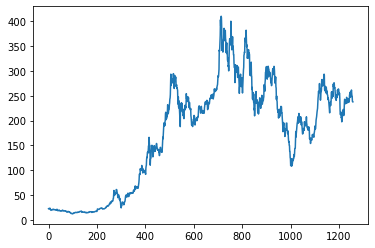

In [10]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [11]:
import numpy as np

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [13]:
df1

array([[0.02619176],
       [0.02672437],
       [0.02780299],
       ...,
       [0.56908709],
       [0.56778068],
       [0.56667526]])

In [14]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [15]:
training_size,test_size

(817, 441)

In [16]:
train_data


array([[0.02619176],
       [0.02672437],
       [0.02780299],
       [0.02818654],
       [0.02603265],
       [0.02771255],
       [0.02798388],
       [0.02819492],
       [0.02064959],
       [0.02009018],
       [0.01819254],
       [0.01884909],
       [0.0197753 ],
       [0.01966476],
       [0.01984564],
       [0.02173993],
       [0.02144683],
       [0.02231609],
       [0.02242998],
       [0.02384693],
       [0.0231552 ],
       [0.0215289 ],
       [0.02124249],
       [0.02242161],
       [0.02224909],
       [0.02163944],
       [0.02090249],
       [0.02159087],
       [0.02121569],
       [0.02069983],
       [0.01880219],
       [0.01938505],
       [0.02006505],
       [0.01991264],
       [0.02273983],
       [0.02360072],
       [0.01939845],
       [0.01781904],
       [0.0163418 ],
       [0.01629155],
       [0.01635017],
       [0.0176147 ],
       [0.01875027],
       [0.01748406],
       [0.018422  ],
       [0.01858948],
       [0.01615588],
       [0.015

In [17]:
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)



In [18]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [19]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [20]:
print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [21]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [23]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 214s 3s/step - loss: 0.0713 - val_loss: 0.0067
Epoch 2/100
12/12 [==============================] - 6s 509ms/step - loss: 0.0134 - val_loss: 0.0148
Epoch 3/100
12/12 [==============================] - 6s 506ms/step - loss: 0.0050 - val_loss: 0.0049
Epoch 4/100
12/12 [==============================] - 7s 587ms/step - loss: 0.0034 - val_loss: 0.0046
Epoch 5/100
12/12 [==============================] - 8s 638ms/step - loss: 0.0031 - val_loss: 0.0045
Epoch 6/100
12/12 [==============================] - 7s 577ms/step - loss: 0.0031 - val_loss: 0.0050
Epoch 7/100
12/12 [==============================] - 8s 651ms/step - loss: 0.0029 - val_loss: 0.0051
Epoch 8/100
12/12 [==============================] - 6s 512ms/step - loss: 0.0029 - val_loss: 0.0047
Epoch 9/100
12/12 [==============================] - 6s 491ms/step - loss: 0.0028 - val_loss: 0.0048
Epoch 10/100
12/12 [==============================] - 6s 506ms/step - loss: 0.0029 - val_los

Epoch 80/100
12/12 [==============================] - 4s 311ms/step - loss: 8.4540e-04 - val_loss: 0.0010
Epoch 81/100
12/12 [==============================] - 4s 306ms/step - loss: 6.8985e-04 - val_loss: 6.9065e-04
Epoch 82/100
12/12 [==============================] - 4s 296ms/step - loss: 6.9531e-04 - val_loss: 7.0224e-04
Epoch 83/100
12/12 [==============================] - 4s 307ms/step - loss: 6.9665e-04 - val_loss: 6.7765e-04
Epoch 84/100
12/12 [==============================] - 4s 305ms/step - loss: 7.3725e-04 - val_loss: 7.2119e-04
Epoch 85/100
12/12 [==============================] - 3s 290ms/step - loss: 6.8695e-04 - val_loss: 8.2512e-04
Epoch 86/100
12/12 [==============================] - 3s 287ms/step - loss: 7.9292e-04 - val_loss: 6.5800e-04
Epoch 87/100
12/12 [==============================] - 3s 289ms/step - loss: 8.1701e-04 - val_loss: 6.6875e-04
Epoch 88/100
12/12 [==============================] - 3s 286ms/step - loss: 7.5102e-04 - val_loss: 6.5201e-04
Epoch 89/100
1

In [26]:
import tensorflow as tf

In [27]:
tf.__version__

'2.11.0'

In [28]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 1s 58ms/step


In [29]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [30]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

200.8471957039462

In [31]:
math.sqrt(mean_squared_error(ytest,test_predict))

231.39872622167607

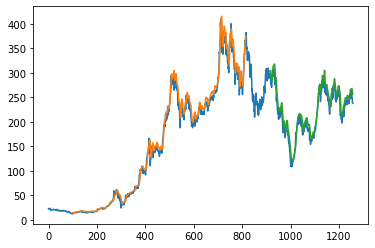

In [32]:
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [33]:
len(test_data)

441

In [34]:
x_input=test_data[340:].reshape(1,-1)
x_input.shape

(1, 101)

In [35]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
temp_input

[0.572378227910892,
 0.5552944605047119,
 0.5368037946062579,
 0.520775201069283,
 0.5114042521832459,
 0.5510737650278908,
 0.5558722938140385,
 0.5650925035759035,
 0.5479584897949991,
 0.5694388149895345,
 0.5700166482988612,
 0.6161428202955478,
 0.6154393710494109,
 0.6184039071581304,
 0.5855679012759576,
 0.6144093203675678,
 0.6029280237431202,
 0.601847726686553,
 0.594335893665306,
 0.6573448475692765,
 0.6420197032784385,
 0.6516167608507338,
 0.6635251516603359,
 0.659379825745601,
 0.6364926020587918,
 0.6395576309169595,
 0.6297344646584058,
 0.6124245885659674,
 0.5852412998402512,
 0.5905422923736395,
 0.583331937600737,
 0.5742373437756823,
 0.5890097779445557,
 0.5986570818915751,
 0.6021240817475352,
 0.5893866257549861,
 0.6261418488656357,
 0.6233531750684503,
 0.6245590880618277,
 0.6223984939486933,
 0.6323221529566949,
 0.6307393921528871,
 0.6203886389597308,
 0.6009181687541578,
 0.607952661215526,
 0.6102891176401949,
 0.5797141986206047,
 0.5230111647445036,

In [36]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

0 day input [0.55529446 0.53680379 0.5207752  0.51140425 0.55107377 0.55587229
 0.5650925  0.54795849 0.56943881 0.57001665 0.61614282 0.61543937
 0.61840391 0.5855679  0.61440932 0.60292802 0.60184773 0.59433589
 0.65734485 0.6420197  0.65161676 0.66352515 0.65937983 0.6364926
 0.63955763 0.62973446 0.61242459 0.5852413  0.59054229 0.58333194
 0.57423734 0.58900978 0.59865708 0.60212408 0.58938663 0.62614185
 0.62335318 0.62455909 0.62239849 0.63232215 0.63073939 0.62038864
 0.60091817 0.60795266 0.61028912 0.5797142  0.52301116 0.50261114
 0.50283725 0.51399194 0.50369143 0.48695939 0.49082836 0.46585591
 0.47459878 0.48670816 0.51899145 0.52263432 0.52090082 0.52821166
 0.5280358  0.49756138 0.5092939  0.53205551 0.56647428 0.58011617
 0.55687722 0.55866097 0.56192698 0.57599597 0.55843486 0.56155013
 0.56313289 0.58986397 0.58338218 0.57318217 0.57004177 0.56187674
 0.56976542 0.57139842 0.57961371 0.58262849 0.57232798 0.56546935
 0.57119744 0.60074231 0.60689749 0.60332999 0.6162

7 day output [[0.6874216]]
8 day input [0.56943881 0.57001665 0.61614282 0.61543937 0.61840391 0.5855679
 0.61440932 0.60292802 0.60184773 0.59433589 0.65734485 0.6420197
 0.65161676 0.66352515 0.65937983 0.6364926  0.63955763 0.62973446
 0.61242459 0.5852413  0.59054229 0.58333194 0.57423734 0.58900978
 0.59865708 0.60212408 0.58938663 0.62614185 0.62335318 0.62455909
 0.62239849 0.63232215 0.63073939 0.62038864 0.60091817 0.60795266
 0.61028912 0.5797142  0.52301116 0.50261114 0.50283725 0.51399194
 0.50369143 0.48695939 0.49082836 0.46585591 0.47459878 0.48670816
 0.51899145 0.52263432 0.52090082 0.52821166 0.5280358  0.49756138
 0.5092939  0.53205551 0.56647428 0.58011617 0.55687722 0.55866097
 0.56192698 0.57599597 0.55843486 0.56155013 0.56313289 0.58986397
 0.58338218 0.57318217 0.57004177 0.56187674 0.56976542 0.57139842
 0.57961371 0.58262849 0.57232798 0.56546935 0.57119744 0.60074231
 0.60689749 0.60332999 0.61624331 0.59091914 0.60940981 0.60448566
 0.6147108  0.6268453  0.

 0.79282314 0.80987829 0.82676667 0.84348577]
17 day output [[0.860022]]
18 day input [0.65734485 0.6420197  0.65161676 0.66352515 0.65937983 0.6364926
 0.63955763 0.62973446 0.61242459 0.5852413  0.59054229 0.58333194
 0.57423734 0.58900978 0.59865708 0.60212408 0.58938663 0.62614185
 0.62335318 0.62455909 0.62239849 0.63232215 0.63073939 0.62038864
 0.60091817 0.60795266 0.61028912 0.5797142  0.52301116 0.50261114
 0.50283725 0.51399194 0.50369143 0.48695939 0.49082836 0.46585591
 0.47459878 0.48670816 0.51899145 0.52263432 0.52090082 0.52821166
 0.5280358  0.49756138 0.5092939  0.53205551 0.56647428 0.58011617
 0.55687722 0.55866097 0.56192698 0.57599597 0.55843486 0.56155013
 0.56313289 0.58986397 0.58338218 0.57318217 0.57004177 0.56187674
 0.56976542 0.57139842 0.57961371 0.58262849 0.57232798 0.56546935
 0.57119744 0.60074231 0.60689749 0.60332999 0.61624331 0.59091914
 0.60940981 0.60448566 0.6147108  0.6268453  0.60609355 0.59428565
 0.59413491 0.56908709 0.56778068 0.56667526

27 day output [[1.0040857]]
28 day input [0.59054229 0.58333194 0.57423734 0.58900978 0.59865708 0.60212408
 0.58938663 0.62614185 0.62335318 0.62455909 0.62239849 0.63232215
 0.63073939 0.62038864 0.60091817 0.60795266 0.61028912 0.5797142
 0.52301116 0.50261114 0.50283725 0.51399194 0.50369143 0.48695939
 0.49082836 0.46585591 0.47459878 0.48670816 0.51899145 0.52263432
 0.52090082 0.52821166 0.5280358  0.49756138 0.5092939  0.53205551
 0.56647428 0.58011617 0.55687722 0.55866097 0.56192698 0.57599597
 0.55843486 0.56155013 0.56313289 0.58986397 0.58338218 0.57318217
 0.57004177 0.56187674 0.56976542 0.57139842 0.57961371 0.58262849
 0.57232798 0.56546935 0.57119744 0.60074231 0.60689749 0.60332999
 0.61624331 0.59091914 0.60940981 0.60448566 0.6147108  0.6268453
 0.60609355 0.59428565 0.59413491 0.56908709 0.56778068 0.56667526
 0.59077722 0.59484679 0.60606837 0.62040806 0.63615555 0.65273219
 0.66988724 0.68742162 0.70515031 0.72292072 0.74062377 0.75819272
 0.77559555 0.79282314 

In [37]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [38]:
len(df1)

1258

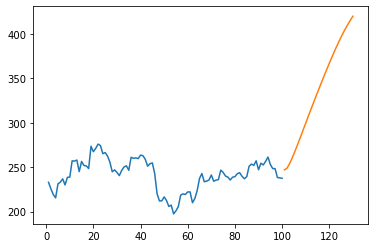

In [39]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

In [40]:
print(df1[1158:].flatten())
print(day_new)
print(np.array(lst_output).flatten())
print(day_pred)

[0.55529446 0.53680379 0.5207752  0.51140425 0.55107377 0.55587229
 0.5650925  0.54795849 0.56943881 0.57001665 0.61614282 0.61543937
 0.61840391 0.5855679  0.61440932 0.60292802 0.60184773 0.59433589
 0.65734485 0.6420197  0.65161676 0.66352515 0.65937983 0.6364926
 0.63955763 0.62973446 0.61242459 0.5852413  0.59054229 0.58333194
 0.57423734 0.58900978 0.59865708 0.60212408 0.58938663 0.62614185
 0.62335318 0.62455909 0.62239849 0.63232215 0.63073939 0.62038864
 0.60091817 0.60795266 0.61028912 0.5797142  0.52301116 0.50261114
 0.50283725 0.51399194 0.50369143 0.48695939 0.49082836 0.46585591
 0.47459878 0.48670816 0.51899145 0.52263432 0.52090082 0.52821166
 0.5280358  0.49756138 0.5092939  0.53205551 0.56647428 0.58011617
 0.55687722 0.55866097 0.56192698 0.57599597 0.55843486 0.56155013
 0.56313289 0.58986397 0.58338218 0.57318217 0.57004177 0.56187674
 0.56976542 0.57139842 0.57961371 0.58262849 0.57232798 0.56546935
 0.57119744 0.60074231 0.60689749 0.60332999 0.61624331 0.59091

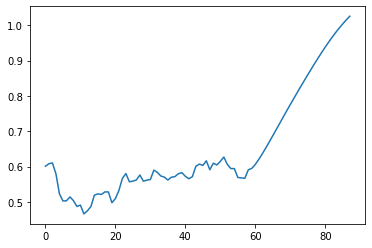

In [41]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [42]:
df3=scaler.inverse_transform(df3).tolist()

In [43]:
data=pd.DataFrame(np.array(df3[1200:])).to_csv("data.csv")

In [44]:
df=pd.read_csv("data.csv")

In [45]:
df.to_json(orient='values')

'[[0,251.12],[1,253.92],[2,254.85],[3,242.68],[4,220.11],[5,211.99],[6,212.08],[7,216.52],[8,212.42],[9,205.76],[10,207.3],[11,197.36],[12,200.84],[13,205.66],[14,218.51],[15,219.96],[16,219.27],[17,222.18],[18,222.11],[19,209.98],[20,214.65],[21,223.71],[22,237.41],[23,242.84],[24,233.59],[25,234.3],[26,235.6],[27,241.2],[28,234.21],[29,235.45],[30,236.08],[31,246.72],[32,244.14],[33,240.08],[34,238.83],[35,235.58],[36,238.72],[37,239.37],[38,242.64],[39,243.84],[40,239.74],[41,237.01],[42,239.29],[43,251.05],[44,253.5],[45,252.08],[46,257.22],[47,247.14],[48,254.5],[49,252.54],[50,256.61],[51,261.44],[52,253.18],[53,248.48],[54,248.42],[55,238.45],[56,237.93],[57,237.49],[58,247.0835096191],[59,248.7033545329],[60,253.1699803222],[61,258.8777295952],[62,265.1458385409],[63,271.7439853125],[64,278.5723590313],[65,285.551718353],[66,292.6084210226],[67,299.6817311596],[68,306.7282320993],[69,313.721351894],[70,320.6483502437],[71,327.5055972307],[72,334.2942079276],[73,341.0164362051],

In [46]:
df3=scaler.inverse_transform(df3).tolist()

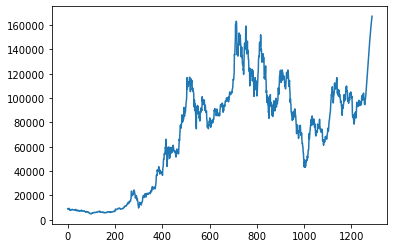

In [47]:
plt.plot(df3)